In [0]:
import pandas as pd
import seaborn as sns

Chargez les données disponibles à l'adresse suivante: url = https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip. Ce sont les données utilisées lors du checkpoint.

In [0]:
music = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/spotify.zip')

In [0]:
music.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


Vérifiez la présence de valeurs nulles ou manquantes et afficher les types des différentes variables.

In [0]:
music.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [0]:
music.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [0]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

Réalisez un analyse en composantes principales. Pour cela: 
- sélectionnez les variables numériques pertinentes
- centrez et réduisez les données 
- appliquez l'ACP
- faites le graphique de la variance expliquée
- déterminez le nombre de composantes à garder 
- affichez la nouvelle table avec uniquement les composantes principales sélectionnées

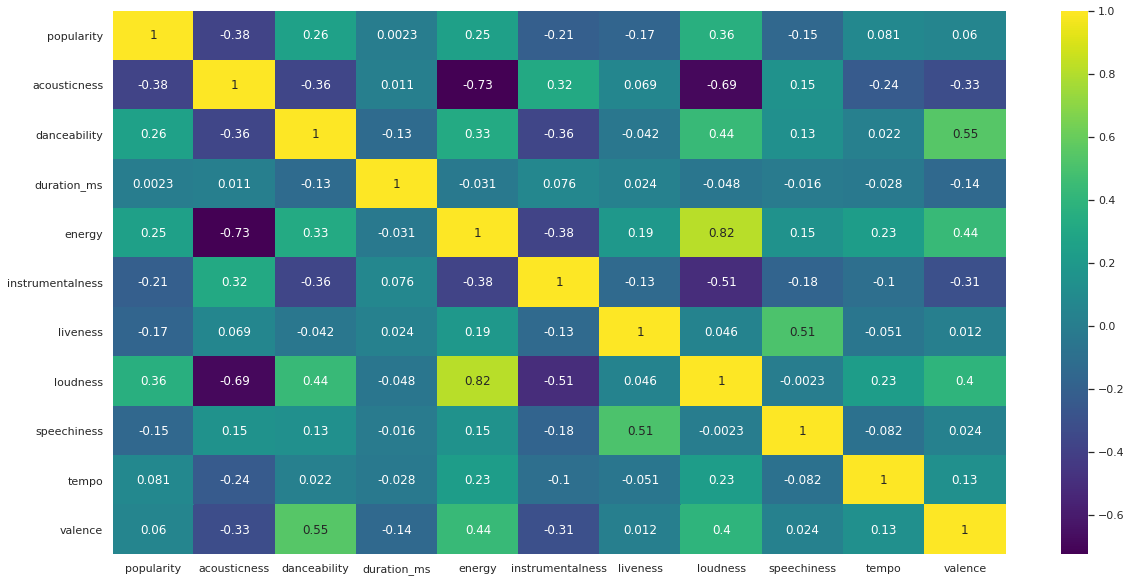

In [0]:
# Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# voir les corrélations entre les colonnes du DF
plt.figure(figsize = (20,10))
sns.heatmap(music.corr(),cmap='viridis',annot=True)
plt.show()

In [0]:
#Stocke les noms des colonnes numériques dans un array que tu nommeras columnsNames
columnsNames = music.columns[music.dtypes.values != np.dtype("object")]
print(columnsNames)
df_num = music[columnsNames]
X = df_num.values
X

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')


array([[0.00000e+00, 6.11000e-01, 3.89000e-01, ..., 5.25000e-02,
        1.66969e+02, 8.14000e-01],
       [1.00000e+00, 2.46000e-01, 5.90000e-01, ..., 8.68000e-02,
        1.74003e+02, 8.16000e-01],
       [3.00000e+00, 9.52000e-01, 6.63000e-01, ..., 3.62000e-02,
        9.94880e+01, 3.68000e-01],
       ...,
       [4.70000e+01, 9.01000e-01, 5.17000e-01, ..., 1.48000e-01,
        8.41350e+01, 8.13000e-01],
       [4.40000e+01, 2.62000e-01, 7.45000e-01, ..., 1.46000e-01,
        1.00031e+02, 4.89000e-01],
       [3.50000e+01, 9.73000e-02, 7.58000e-01, ..., 2.87000e-02,
        1.13897e+02, 4.79000e-01]])

In [0]:
from sklearn.decomposition import PCA
pca = PCA()

from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

Xpca = pca.fit_transform(X_scaled)
Xpca

array([[-0.99045021,  0.99939247, -0.15971079, ..., -0.57606002,
        -1.16234344,  0.04739106],
       [-1.20961308,  0.27304197, -0.6842291 , ...,  0.05743423,
        -0.09104391, -0.13059361],
       [ 2.1124023 ,  0.35316191, -1.86682122, ...,  0.8724981 ,
        -0.59542754, -0.0997507 ],
       ...,
       [ 0.32506902,  0.19737258, -1.67204781, ..., -1.47518739,
        -0.71435391, -0.34179443],
       [-1.06009706,  0.64113552, -0.34201002, ...,  0.57789031,
        -0.12977614,  0.2320321 ],
       [-0.74982873, -0.6666449 , -0.23754489, ...,  0.85888183,
         0.1452915 , -0.38296445]])

In [0]:
Xpca = pd.DataFrame(Xpca)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.3282235 , 0.15545747, 0.10647707, 0.09089407, 0.07833839,
       0.06879605, 0.05798688, 0.04412532, 0.03410832, 0.02515864,
       0.01043429])

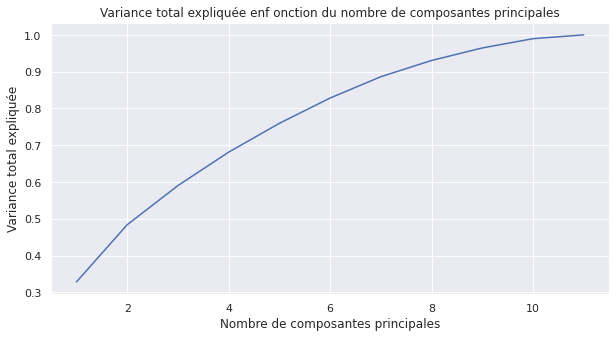

In [0]:
from matplotlib.pyplot import figure
figure(figsize=(10,5))
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance total expliquée')
plt.title('Variance total expliquée enf onction du nombre de composantes principales')
plt.show()

In [0]:
# trouver le nb_composantes pour <= 70% de variance
ratio = 0
nb_composantes = 0

while ratio <= 0.7:
  ratio += pca.explained_variance_ratio_[nb_composantes]
  nb_composantes += 1

print(str(nb_composantes) + " composantes principales expliquent au moins " + str(round(ratio*100,1)) + "% de la variance.")

5 composantes principales expliquent au moins 75.9% de la variance.


affichez la nouvelle table avec uniquement les composantes principales sélectionnées

In [0]:
df_num = music[columnsNames]

In [0]:
pca = PCA(n_components=5)
Xpca2 =pca.fit_transform(X_scaled)


In [0]:
df_pca = pd.DataFrame(Xpca2)
df_pca

,0,1,2,3,4
0,-0.990450,0.999392,-0.159711,-3.096298,0.713255
1,-1.209613,0.273042,-0.684229,-2.729830,1.282702
2,2.112402,0.353162,-1.866821,-0.266675,0.709725
3,1.954505,-0.186844,0.251315,-2.661387,-0.022116
4,2.935588,0.391576,-1.123134,-2.093773,-0.025188
...,...,...,...,...,...
232720,-0.923589,-0.893221,-0.467573,0.010477,1.997912
232721,-1.909356,-0.022248,-0.836774,0.211650,1.506918
232722,0.325069,0.197373,-1.672048,0.644906,0.064459
232723,-1.060097,0.641136,-0.342010,0.663994,-0.065338


Réalisez une projection des données dans le premier plan  factoriel (PC1 et PC2 en *x* et *y*) et colorez les morceaux par genre.

In [0]:
#df_pca = pdf_pca.merge(music['genre'], on=)
df_pca = pd.concat([df_pca, music['genre']], axis=1)
df_pca


,0,1,2,3,4,genre
0,-0.990450,0.999392,-0.159711,-3.096298,0.713255,Movie
1,-1.209613,0.273042,-0.684229,-2.729830,1.282702,Movie
2,2.112402,0.353162,-1.866821,-0.266675,0.709725,Movie
3,1.954505,-0.186844,0.251315,-2.661387,-0.022116,Movie
4,2.935588,0.391576,-1.123134,-2.093773,-0.025188,Movie
...,...,...,...,...,...,...
232720,-0.923589,-0.893221,-0.467573,0.010477,1.997912,Soul
232721,-1.909356,-0.022248,-0.836774,0.211650,1.506918,Soul
232722,0.325069,0.197373,-1.672048,0.644906,0.064459,Soul
232723,-1.060097,0.641136,-0.342010,0.663994,-0.065338,Soul


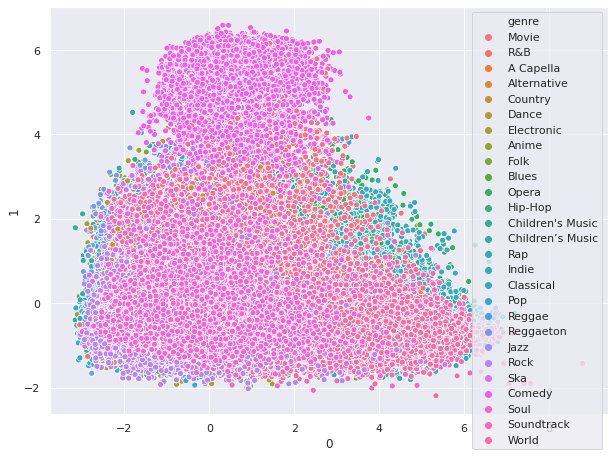

In [0]:
import seaborn as sns
plt.figure(figsize=(10,7.5))
sns.scatterplot(x=df_pca[0], y=df_pca[1], hue=df_pca['genre'])
plt.show()

Si vous avez terminé, réalisez le cercle des corrélations dans le premier plan factoriel.

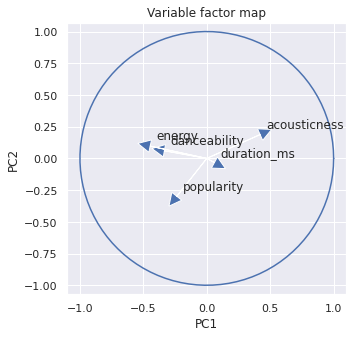

In [0]:
#@title
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(5, 5))
for i in range(0, len(pca.components_)):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
            pca.components_[1, i] + 0.05,
            columnsNames[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()